In [12]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

2.19.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [13]:
import numpy as np
import pandas as pd
import time

In [14]:
df = pd.read_csv('Social_Network_Ads.csv')

In [15]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
df = df[['Age','EstimatedSalary','Purchased']]

In [17]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [18]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [19]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled.shape

(400, 2)

In [22]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
#X_train.shape

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/home/user/anaconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1768991772.288474  953960 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12405 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:3b:00.0, compute capability: 8.6


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=50,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/500


I0000 00:00:1768991773.836856  954565 service.cc:152] XLA service 0x7fbb98006380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768991773.836879  954565 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2026-01-21 16:06:13.854644: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1768991773.965694  954565 cuda_dnn.cc:529] Loaded cuDNN version 91002


 48/320 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6063 - loss: 0.6750    

I0000 00:00:1768991774.275642  954565 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7250 - loss: 0.5434 - val_accuracy: 0.4500 - val_loss: 0.6865
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - loss: 0.4040 - val_accuracy: 0.6875 - val_loss: 0.5616
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8094 - loss: 0.3529 - val_accuracy: 0.8375 - val_loss: 0.4465
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8281 - loss: 0.3204 - val_accuracy: 0.8750 - val_loss: 0.3978
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3164 - val_accuracy: 0.8750 - val_loss: 0.3425
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8500 - loss: 0.3067 - val_accuracy: 0.8750 - val_loss: 0.3202
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8562 - loss: 0.2968 - val_accuracy: 0.9250 - val_loss: 0.2996
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8656 - loss: 0.2947 - val_accuracy: 0.9125

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.1906 - loss: 0.8165 - val_accuracy: 0.5250 - val_loss: 0.6254
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1969 - loss: 0.8012 - val_accuracy: 0.5250 - val_loss: 0.6230
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.2031 - loss: 0.7910 - val_accuracy: 0.5250 - val_loss: 0.6219
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2188 - loss: 0.7823 - val_accuracy: 0.5250 - val_loss: 0.6216
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2500 - loss: 0.7746 - val_accuracy: 0.5250 - val_loss: 0.6202
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2719 - loss: 0.7682 - val_accuracy: 0.5250 - val_loss: 0.6189
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2875 - loss: 0.7620 - val_accuracy: 0.5250 - val_loss: 0.6191
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3063 - loss: 0.7562 - val_accuracy: 0.5500 - val_loss: 0.6186

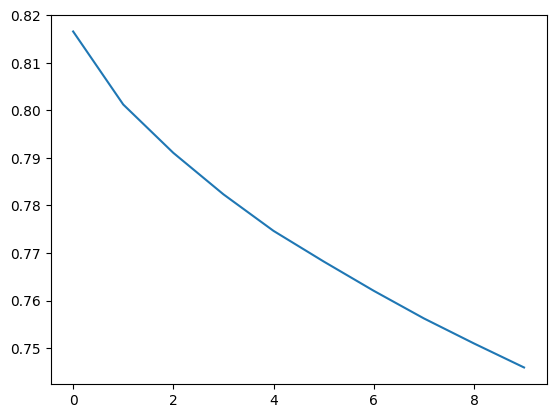

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
import sys
print(sys.executable)


/home/user/anaconda3/envs/deeplearning/bin/python


In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.20.0
GPUs: []


In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

2.20.0
[]
True
